In [49]:
# series de pandas
import pandas as pd

numeros = [1, 2, 3, 4, 5]
serie = pd.Series(numeros)
serie, type(serie)

(0    1
 1    2
 2    3
 3    4
 4    5
 dtype: int64,
 pandas.core.series.Series)

In [50]:
#data Frame
data = {
    'nombre': ['Juan', 'Ana', 'Pedro'], 
    'edad': [28, 22, 35],
    'ciudad': ['Madrid', 'Barcelona', 'Valencia']}
df = pd.DataFrame(data)
df, type(df)

(  nombre  edad     ciudad
 0   Juan    28     Madrid
 1    Ana    22  Barcelona
 2  Pedro    35   Valencia,
 pandas.core.frame.DataFrame)

In [51]:
#exprotar data frame a csv
df.to_csv('dataFrame.csv', index=False)

In [52]:
#importar data frame desde csv
df_importado = pd.read_csv('dataFrame.csv')
df_importado, type(df_importado)

(  nombre  edad     ciudad
 0   Juan    28     Madrid
 1    Ana    22  Barcelona
 2  Pedro    35   Valencia,
 pandas.core.frame.DataFrame)

In [53]:
#manipulacion de datos con pandas
# Seleccionar una columna
nombres = df['nombre']
nombres, type(nombres)

(0     Juan
 1      Ana
 2    Pedro
 Name: nombre, dtype: object,
 pandas.core.series.Series)

In [54]:
df[['nombre', 'edad']]  # Seleccionar varias columnas

,nombre,edad
0,Juan,28
1,Ana,22
2,Pedro,35


In [55]:
# filtras por indices
df.iloc[0:2]  # Filtrar por filas (primeras dos filas)
#df.iloc[:, 0:2]  # Filtrar por columnas (primeras dos columnas

,nombre,edad,ciudad
0,Juan,28,Madrid
1,Ana,22,Barcelona


In [56]:
df[df['edad'] > 30]  # Filtrar por condición (edades mayores a 30)

,nombre,edad,ciudad
2,Pedro,35,Valencia


In [57]:
filtro = (df['edad'] > 23) & (df['nombre'].str.startswith('A')) # Filtrar por múltiples condiciones
df[filtro]  # Aplicar el filtro

,nombre,edad,ciudad


In [58]:
df[df['nombre'].isin(['Ana', 'Pedro'])]  # Filtrar por valores específicos en una columna

,nombre,edad,ciudad
1,Ana,22,Barcelona
2,Pedro,35,Valencia


In [59]:
# Filtrar usando una función personalizada
# Definir una función que verifica si el nombre tiene longitud 5
def longitud5(nombre):
    return len(nombre) == 5;

df[df['nombre'].apply(longitud5)] # Filtrar usando una función personalizada

,nombre,edad,ciudad
2,Pedro,35,Valencia


In [60]:
df[df['edad'].between(20, 30)]  # Filtrar por rango de valores

,nombre,edad,ciudad
0,Juan,28,Madrid
1,Ana,22,Barcelona


In [61]:
import numpy as np

In [62]:
data = {
    'nombre': ['Juan', 'Ana', 'Pedro', 'Luis', 'María', 'Carlos'],
    'edad': [28, 22, 35, 30, 25, 40],
    'ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', None, 'Zaragoza']}

df = pd.DataFrame(data)
df

,nombre,edad,ciudad
0,Juan,28,Madrid
1,Ana,22,Barcelona
2,Pedro,35,Valencia
3,Luis,30,Sevilla
4,María,25,None
5,Carlos,40,Zaragoza


In [63]:
#rellenar valores faltantes
df_fill = df.fillna( 
                    {
                        'edad': df['edad'].mean(),  # Rellenar con la media de la columna 'edad'
                        'ciudad': 'Desconocido'  # Rellenar con un valor fijo para la columna 'ciudad'  
                    })
df_fill

,nombre,edad,ciudad
0,Juan,28,Madrid
1,Ana,22,Barcelona
2,Pedro,35,Valencia
3,Luis,30,Sevilla
4,María,25,Desconocido
5,Carlos,40,Zaragoza


In [64]:
df_sin_nulos = df.dropna()  # Eliminar filas con valores nulos
df_sin_nulos

,nombre,edad,ciudad
0,Juan,28,Madrid
1,Ana,22,Barcelona
2,Pedro,35,Valencia
3,Luis,30,Sevilla
5,Carlos,40,Zaragoza


In [65]:
#reemplazar valores 
df_replace = df.replace(
    {'ciudad': {None:'Desconocido'}} )
df_replace

,nombre,edad,ciudad
0,Juan,28,Madrid
1,Ana,22,Barcelona
2,Pedro,35,Valencia
3,Luis,30,Sevilla
4,María,25,Desconocido
5,Carlos,40,Zaragoza


In [66]:
# interpolar valores

df_interpolado = df.copy()
df_interpolado['edad'] = df['edad'].interpolate()  # Interpolar valores en la columna 'edad'
df_interpolado

,nombre,edad,ciudad
0,Juan,28,Madrid
1,Ana,22,Barcelona
2,Pedro,35,Valencia
3,Luis,30,Sevilla
4,María,25,None
5,Carlos,40,Zaragoza


In [67]:
data2 = {
    'nombre': ['Juana', 'Miguel', 'Jose', 'Maria', 'MaríaJose', 'Carla', 'Juana', 'Miguel' ],
    'edad': [28, 22, 35, np.nan, 25, 40, 28, 22],
    'ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', None, 'Zaragoza', 'Madrid', 'Barcelona'],
    'puntuacion': [10, 8, 9, 7, 6, 5, 10, 8]
}

df2 = pd.DataFrame(data2)
df2

,nombre,edad,ciudad,puntuacion
0,Juana,28.0,Madrid,10
1,Miguel,22.0,Barcelona,8
2,Jose,35.0,Valencia,9
3,Maria,NaN,Sevilla,7
4,MaríaJose,25.0,None,6
5,Carla,40.0,Zaragoza,5
6,Juana,28.0,Madrid,10
7,Miguel,22.0,Barcelona,8


In [68]:
#eliminar duplicados
df2_sin_duplicados = df2.drop_duplicates()
df2_sin_duplicados

,nombre,edad,ciudad,puntuacion
0,Juana,28.0,Madrid,10
1,Miguel,22.0,Barcelona,8
2,Jose,35.0,Valencia,9
3,Maria,NaN,Sevilla,7
4,MaríaJose,25.0,None,6
5,Carla,40.0,Zaragoza,5


In [69]:
#renombrar columnas
df2_renombrado = df2.rename(columns={'nombre': 'Nombre', 'edad': 'Edad', 'ciudad': 'Ciudad'})
df2_renombrado

,Nombre,Edad,Ciudad,puntuacion
0,Juana,28.0,Madrid,10
1,Miguel,22.0,Barcelona,8
2,Jose,35.0,Valencia,9
3,Maria,NaN,Sevilla,7
4,MaríaJose,25.0,None,6
5,Carla,40.0,Zaragoza,5
6,Juana,28.0,Madrid,10
7,Miguel,22.0,Barcelona,8


In [70]:
#orderar columnas
df2_ordenado = df2_renombrado[['Edad', 'Nombre', 'Ciudad']]  # Reordenar columnas
df2_ordenado

,Edad,Nombre,Ciudad
0,28.0,Juana,Madrid
1,22.0,Miguel,Barcelona
2,35.0,Jose,Valencia
3,NaN,Maria,Sevilla
4,25.0,MaríaJose,None
5,40.0,Carla,Zaragoza
6,28.0,Juana,Madrid
7,22.0,Miguel,Barcelona


In [71]:
# transformacionde datos
def cuadrado(x):
    return x ** 2
df['edad_cuadrado'] = df['edad'].apply(cuadrado)  # Aplicar la función cuadrado a la columna 'edad'
df

,nombre,edad,ciudad,edad_cuadrado
0,Juan,28,Madrid,784
1,Ana,22,Barcelona,484
2,Pedro,35,Valencia,1225
3,Luis,30,Sevilla,900
4,María,25,None,625
5,Carlos,40,Zaragoza,1600


In [72]:
# agrupar datos
agrupado = df2.groupby('ciudad')
print(agrupado.groups)# Agrupar por 'ciudad' y calcular la media de las demás columnas

{'Barcelona': [1, 7], 'Madrid': [0, 6], 'Sevilla': [3], 'Valencia': [2], 'Zaragoza': [5]}


In [73]:
# Agrupar datos, calcular la media de las edades y la suma de las puntuaciones por ciudad
#Recordar cual es el dataframe que se esta utilizando
agregado = agrupado.agg(
    {
        'edad': 'mean',      # Calcular la media de las edades
        'puntuacion': 'sum'  # Calcular la suma de las puntuaciones
    }
)
agregado

,edad,puntuacion
ciudad,,
Barcelona,22.0,16
Madrid,28.0,20
Sevilla,NaN,7
Valencia,35.0,9
Zaragoza,40.0,5


In [74]:
#agrgar funciones personalizadas
#definir el rango de edades y puntuaciones
def rango(series):
    return series.max() - series.min()
#aplicar a grupo
agregado = agrupado.agg({
    'edad':  rango,  # Calcular la media y el rango de las edades
    'puntuacion':  rango  # Calcular la suma y el rango de las puntuaciones
})
agregado

,edad,puntuacion
ciudad,,
Barcelona,0.0,0
Madrid,0.0,0
Sevilla,NaN,0
Valencia,0.0,0
Zaragoza,0.0,0


In [75]:
data2 ['categoria'] = ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
df2 = pd.DataFrame(data2)
df2


,nombre,edad,ciudad,puntuacion,categoria
0,Juana,28.0,Madrid,10,A
1,Miguel,22.0,Barcelona,8,B
2,Jose,35.0,Valencia,9,A
3,Maria,NaN,Sevilla,7,B
4,MaríaJose,25.0,None,6,A
5,Carla,40.0,Zaragoza,5,B
6,Juana,28.0,Madrid,10,A
7,Miguel,22.0,Barcelona,8,B


In [76]:
#AGRUPAR DATOS POR CATEGORIA Y CIUDAD
multi_agrupado = df2.groupby(['categoria', 'ciudad'])
multi_agrupado.groups

{('A', 'Madrid'): [0, 6], ('A', 'Valencia'): [2], ('A', nan): [4], ('B', 'Barcelona'): [1, 7], ('B', 'Sevilla'): [3], ('B', 'Zaragoza'): [5]}

In [77]:
#calcular la sula de las edades y puntuaciones por categoria y ciudad
agregado_multi = multi_agrupado.agg({
    'edad': 'sum',        # Calcular la suma de las edades
    'puntuacion': 'sum'  # Calcular la suma de las puntuaciones
})
print(agregado_multi)


                     edad  puntuacion
categoria ciudad                     
A         Madrid     56.0          20
          Valencia   35.0           9
B         Barcelona  44.0          16
          Sevilla     0.0           7
          Zaragoza   40.0           5


In [78]:
#agrgar datos
#agrgar fila
new_row = pd.Series({ 'nombre':'Alex', 'edad': 30, 'ciudad': 'Madrid', 'puntuacion': 9, 'categoria': 'A' })
df2 = pd.concat([df2, new_row.to_frame().T], ignore_index=True)  # Agregar la nueva fila al DataFrame
df2

,nombre,edad,ciudad,puntuacion,categoria
0,Juana,28.0,Madrid,10,A
1,Miguel,22.0,Barcelona,8,B
2,Jose,35.0,Valencia,9,A
3,Maria,NaN,Sevilla,7,B
4,MaríaJose,25.0,None,6,A
5,Carla,40.0,Zaragoza,5,B
6,Juana,28.0,Madrid,10,A
7,Miguel,22.0,Barcelona,8,B
8,Alex,30,Madrid,9,A


In [79]:
#unir dataframes
dataframe1 = {'Nombre': ['Juan', 'Ana', 'Pedro'],
              'Edad': [28, 22, 35],
              'Ciudad': ['Madrid', 'Barcelona', 'Valencia']}
dataframe2 = {'Nombre': ['Luis', 'María', 'Carlos'],
              'Edad': [30, 25, 40], 
                'Ciudad': ['Sevilla', 'Zaragoza', 'Bilbao']}

df1 = pd.DataFrame(dataframe1)
df2 = pd.DataFrame(dataframe2)

# Unir dos DataFrames verticalmente
# Usando pd.concat para unirlos
df_unido = pd.concat([df1, df2], ignore_index=True)  # Unir los DataFrames
df_unido

,Nombre,Edad,Ciudad
0,Juan,28,Madrid
1,Ana,22,Barcelona
2,Pedro,35,Valencia
3,Luis,30,Sevilla
4,María,25,Zaragoza
5,Carlos,40,Bilbao


In [80]:
 # Unir dos DataFrames horizontalmente
# Usando pd.merge para unirlos por una columna común
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Nombre': ['Juan', 'Ana', 'Pedro']})
df2 = pd.DataFrame({'ID': [1, 2, 3], 'Edad': [28, 22, 35]})
df_unido_horizontal = pd.merge(df1, df2, on='ID')  # Unir los DataFrames por la columna 'ID'
df_unido_horizontal

,ID,Nombre,Edad
0,1,Juan,28
1,2,Ana,22
2,3,Pedro,35


In [81]:
# Numpy
import numpy as np
# Crear un array de Numpy
array = np.array([1, 2, 3, 4, 5,6])
array, type(array)

(array([1, 2, 3, 4, 5, 6]), numpy.ndarray)

In [82]:
print ('arregle de una dimension', array)
print ('forma(shape): ', array.shape)  # Mostrar la forma del array
print ('tipo de dato (dtype): ', array.dtype)  # Mostrar el tipo de dato del array

arregle de una dimension [1 2 3 4 5 6]
forma(shape):  (6,)
tipo de dato (dtype):  int64


In [83]:
# reshape en una matriz de 2 filas y 3 columnas
array_reshaped = array.reshape((2, 3))  # Cambiar la forma del array a 2 filas y 3 columnas
array_reshaped, array_reshaped.shape  # Mostrar el array reestructurado y su nueva forma
print ('arregle de dos dimensiones: \n', array_reshaped)
print ('forma(shape): ', array_reshaped.shape)  # Mostrar la forma del array
print ('tipo de dato (dtype): ', array_reshaped.dtype)  # Mostrar el tipo de dato del array

arregle de dos dimensiones: 
 [[1 2 3]
 [4 5 6]]
forma(shape):  (2, 3)
tipo de dato (dtype):  int64


In [84]:
#crear una matriz con numeros aleatorios
array_random =np.random.rand(4 ,4)
print('Matriz de números aleatorios:\n', array_random)

Matriz de números aleatorios:
 [[0.350752   0.9317087  0.50272932 0.37449316]
 [0.09731934 0.58432138 0.48287137 0.57772935]
 [0.99868218 0.18967517 0.95217821 0.1537466 ]
 [0.82432682 0.03114524 0.47218721 0.03671086]]


In [85]:
#crear un arreglo de 2 dimensiones a partir de una lista de listas
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('Arreglo de 3 dimensiones:\n', arr)

Arreglo de 3 dimensiones:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [86]:
#arreglo de 0
array_0 = np.zeros((3, 3))  # Crear un arreglo de 3x3 lleno de ceros
print('Arreglo de ceros:\n', array_0)

Arreglo de ceros:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [87]:
#arreglo de 1
array_1 = np.ones((2, 2))  # Crear un arreglo de 2x2 lleno de unos
print('Arreglo de unos:\n', array_1)

Arreglo de unos:
 [[1. 1.]
 [1. 1.]]


In [88]:
#cambiar un elemento de un arreglo
array_1[0, 0] = 10  # Cambiar el primer elemento
print('Arreglo modificado:\n', array_1)

Arreglo modificado:
 [[10.  1.]
 [ 1.  1.]]


In [89]:
#crear una matriz identidad
array_identity = np.eye(3)  # Crear una matriz identidad de 3x3
print('Matriz identidad:\n', array_identity)

Matriz identidad:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [90]:
#crear un array de 3 dimensiones
array_3d = np.zeros((2, 3, 4))  # Crear un array de 3 dimensiones con forma (2, 3, 4)
print('Array de 3 dimensiones:\n', array_3d)

Array de 3 dimensiones:
 [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [91]:
array_3d = np.arange(24).reshape((2, 3, 4))  # Crear un array de 3 dimensiones con valores del 0 al 23
print('Array de 3 dimensiones con valores del 0 al 23:\n', array_3d)

Array de 3 dimensiones con valores del 0 al 23:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [92]:
#transponer un array
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [93]:
#transponer un array
arr_transposed = arr.T  # Transponer el array
print('Array transpuesto:\n', arr_transposed)

Array transpuesto:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


In [94]:
# combinar arrays
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[5, 6], [7, 8]])
array_combinado = np.concatenate((array1, array2), axis=0)  # Combinar los arrays verticalmente
print('Array combinado:\n', array_combinado)

Array combinado:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [95]:
#concatenar arrays horizontalmente
array_combinado_horizontal = np.hstack((array1, array2))  # Combinar los arrays horizontalmente
array_combinado_horizontal

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [96]:
# Unir dos array verticalmente
array_unido_vertical = np.vstack((array1, array2))  # Unir los arrays verticalmente
print('Array unido verticalmente:\n', array_unido_vertical)

Array unido verticalmente:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [104]:
array = np.array([1, 2, 3, 4, 5])  # Crear un array de Numpy con un conjunto de números
array 

array([1, 2, 3, 4, 5])

In [106]:
#calcular una suma
suma = np.sum(array)  # Calcular la suma de los elementos del array
suma

np.int64(15)

In [113]:
#calcular el promedio
promedio =np.mean(array)  # Calcular el promedio de los elementos del array
promedio

np.float64(3.0)

In [115]:
#calcular la mediana
mediana = np.median(array)  # Calcular la mediana de los elementos del array
mediana

np.float64(3.0)

In [117]:
#desviacion estandar
desviacion_estandar = np.std(array)  # Calcular la desviación estándar de los elementos del array
desviacion_estandar

np.float64(1.4142135623730951)

In [121]:
#calcular el minimo y el maximo
minimo = np.min(array)  # Calcular el valor mínimo del array    
maximo = np.max(array)  # Calcular el valor máximo del array  
print('Mínimo:', minimo)
print('Máximo:', maximo)  


Mínimo: 1
Máximo: 5


In [123]:
#calcular la suma acumulada
suma_acumulada = np.cumsum(array)  # Calcular la suma acumulada 
suma_acumulada

array([ 1,  3,  6, 10, 15])

In [125]:
#crear una arreglo de numpy
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Crear un arreglo de Numpy
#crear un dataframe de pandas a partir de np
df = pd.DataFrame(data, columns=['A', 'B', 'C'])  # Crear un DataFrame de Pandas a partir del arreglo de Numpy
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [127]:
#gerear un DataFrame de Pandas a partir de un array de Numpy
data = {
    "A" : [1, 2, 3],
    "B" : [4, 5, 6],
    "C" : [7, 8, 9]
}
df = pd.DataFrame(data)  # Crear un DataFrame de Pandas a partir del array de Numpy
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [129]:
# crear un DataFrame de Pandas a partir de un array de Numpy
array = df.to_numpy()  # Convertir el DataFrame a un array de Numpy
df_from_array = pd.DataFrame(array, columns=['A', 'B', 'C'])
df_from_array  # Mostrar el DataFrame creado a partir del array de Numpy

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [131]:
df.values # Obtener los valores del DataFrame como un array de Numpy

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [133]:
# calcular el promedio de cada columna utilizan numpy
promedios = np.mean(df, axis=0)  # Calcular el promedio de cada columna del DataFrame
promedios

A    2.0
B    5.0
C    8.0
dtype: float64

In [137]:
# con pandas
df.mean(axis=0)  # Calcular el promedio de cada columna del DataFrame usando Pandas


A    2.0
B    5.0
C    8.0
dtype: float64

In [138]:
df.mean(axis=1)  # Calcular el promedio de cada fila del DataFrame usando Pandas

0    4.0
1    5.0
2    6.0
dtype: float64

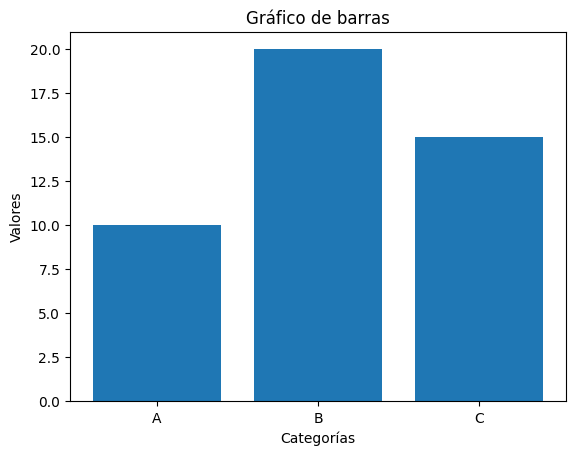

In [142]:
#Matplotlib
import matplotlib.pyplot as plt
# crear grafico de barras
x = ['A', 'B', 'C']
y = [10, 20, 15]    
plt.bar(x, y)  # Crear un gráfico de barras
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Valores')  # Etiqueta del eje y
plt.title('Gráfico de barras')  # Título del gráfico  
plt.show()  # Mostrar el gráfico

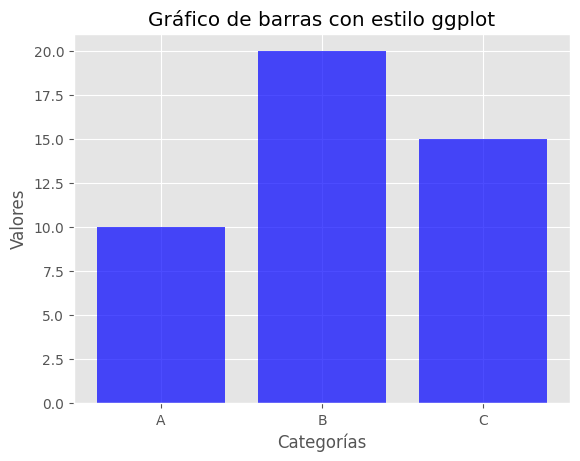

In [144]:
plt.style.use('ggplot')  # Cambiar el estilo del gráfico a 'ggplot'
plt.bar(x, y, color='blue', alpha=0.7)  # Crear un gráfico de barras con color y transparencia
plt.xlabel('Categorías')  # Etiqueta del eje x      
plt.ylabel('Valores')  # Etiqueta del eje y
plt.title('Gráfico de barras con estilo ggplot')  # Título del gráfico
plt.show()  # Mostrar el gráfico

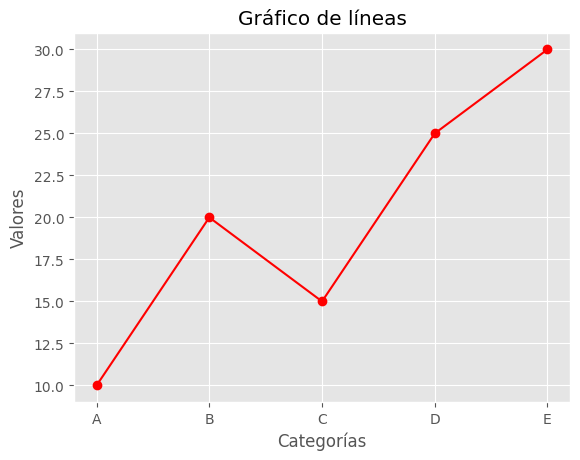

In [148]:
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 20, 15, 25, 30]

plt.plot(x, y, marker='o', linestyle='-', color='r')  # Crear un gráfico de líneas
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Valores')  # Etiqueta del eje y
plt.title('Gráfico de líneas')  # Título del gráfico    
plt.show()  # Mostrar el gráfico

C:\Users\BlackMurder\AppData\Local\Temp\ipykernel_29976\2539348284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='viridis')  # Crear un gráfico de barras con Seaborn


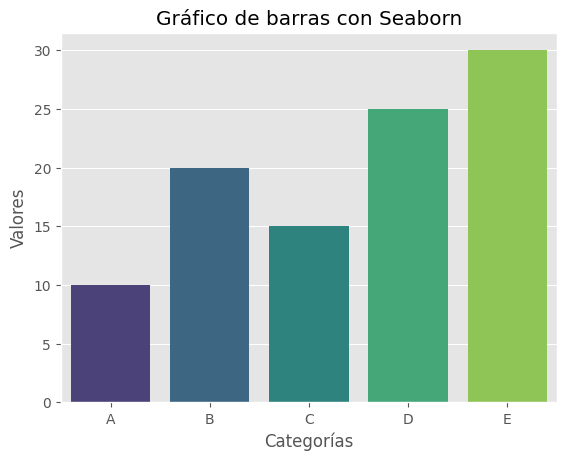

In [153]:
# biblioteca seaborn
import seaborn as sns
# Crear un gráfico de barras con Seaborn
sns.barplot(x=x, y=y, palette='viridis')  # Crear un gráfico de barras con Seaborn
plt.xlabel('Categorías')  # Etiqueta del eje x  
plt.ylabel('Valores')  # Etiqueta del eje y
plt.title('Gráfico de barras con Seaborn')  # Título del gráfico
plt.show()  # Mostrar el gráfico

In [158]:
# iris
data = sns.load_dataset('iris')  # Cargar un conjunto de datos de ejemplo
data, set(data["species"])  # Mostrar el DataFrame y las columnas disponibles

(     sepal_length  sepal_width  petal_length  petal_width    species
 0             5.1          3.5           1.4          0.2     setosa
 1             4.9          3.0           1.4          0.2     setosa
 2             4.7          3.2           1.3          0.2     setosa
 3             4.6          3.1           1.5          0.2     setosa
 4             5.0          3.6           1.4          0.2     setosa
 ..            ...          ...           ...          ...        ...
 145           6.7          3.0           5.2          2.3  virginica
 146           6.3          2.5           5.0          1.9  virginica
 147           6.5          3.0           5.2          2.0  virginica
 148           6.2          3.4           5.4          2.3  virginica
 149           5.9          3.0           5.1          1.8  virginica
 
 [150 rows x 5 columns],
 {'setosa', 'versicolor', 'virginica'})

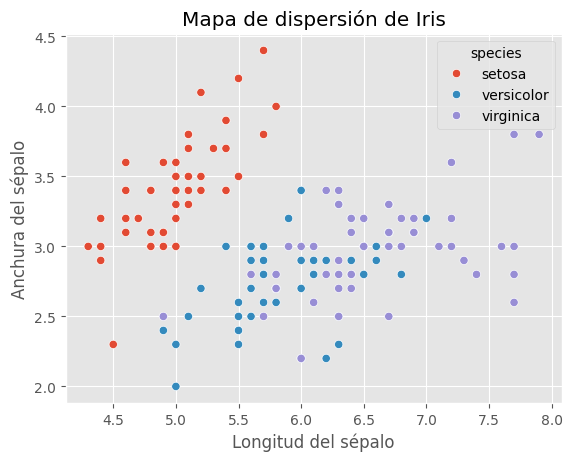

In [159]:
#mapa de dispersion
data = sns.load_dataset('iris')  # Cargar un conjunto de datos de ejemplo
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)  # Crear un mapa de dispersión
plt.xlabel('Longitud del sépalo')  # Etiqueta del eje x 
plt.ylabel('Anchura del sépalo')  # Etiqueta del eje y
plt.title('Mapa de dispersión de Iris')  # Título del gráfico
plt.show()  # Mostrar el gráfico

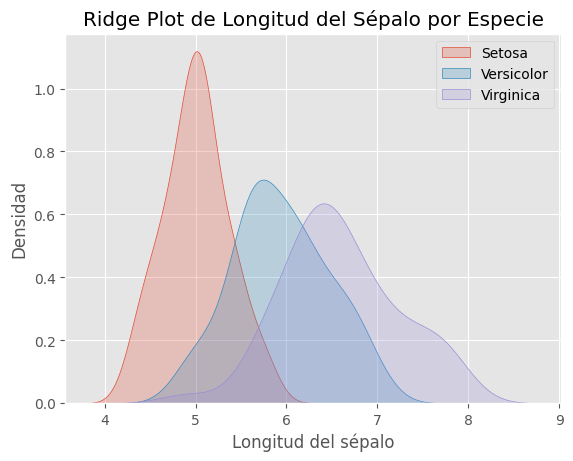

In [164]:
# grafico de ridgeplot
setosa = data[data['species'] == 'setosa']  # Filtrar los datos para la especie 'setosa'
versicolor = data[data['species'] == 'versicolor']  # Filtrar los datos para la especie 'versicolor'
virginica = data[data['species'] == 'virginica']  # Filtrar los datos para la especie 'virginica'

# generar ridge plot
sns.kdeplot(setosa['sepal_length'], label='Setosa', fill=True)
sns.kdeplot(versicolor['sepal_length'], label='Versicolor', fill=True)
sns.kdeplot(virginica['sepal_length'], label='Virginica', fill=True)
plt.xlabel('Longitud del sépalo')  # Etiqueta del eje x
plt.ylabel('Densidad')  # Etiqueta del eje y
plt.title('Ridge Plot de Longitud del Sépalo por Especie')  # Título del gráfico
plt.legend()  # Mostrar la leyenda
plt.show()  # Mostrar el gráfico  



In [170]:
# ejemplo avanzado utilizando seaborn
# datos de ejemplo
np.random.seed(42)  # Fijar la semilla para reproducibilidad
edad_autos = np.random.randint(0,20, size=200)  # Generar un array de Numpy con valores aleatorios
precio_autos = 30 - edad_autos + np.random.normal (-3, 3, size=200)  # Generar precios de autos basados en la edad con ruido aleatorio
data = pd.DataFrame({
    'edad_autos': edad_autos, 
    'precio_autos': precio_autos
})
data

,edad_autos,precio_autos
0,6,23.662535
1,19,9.816449
2,14,10.839106
3,10,16.190199
4,7,19.569613
...,...,...
195,15,12.807953
196,2,30.441000
197,19,9.213749
198,3,24.270218


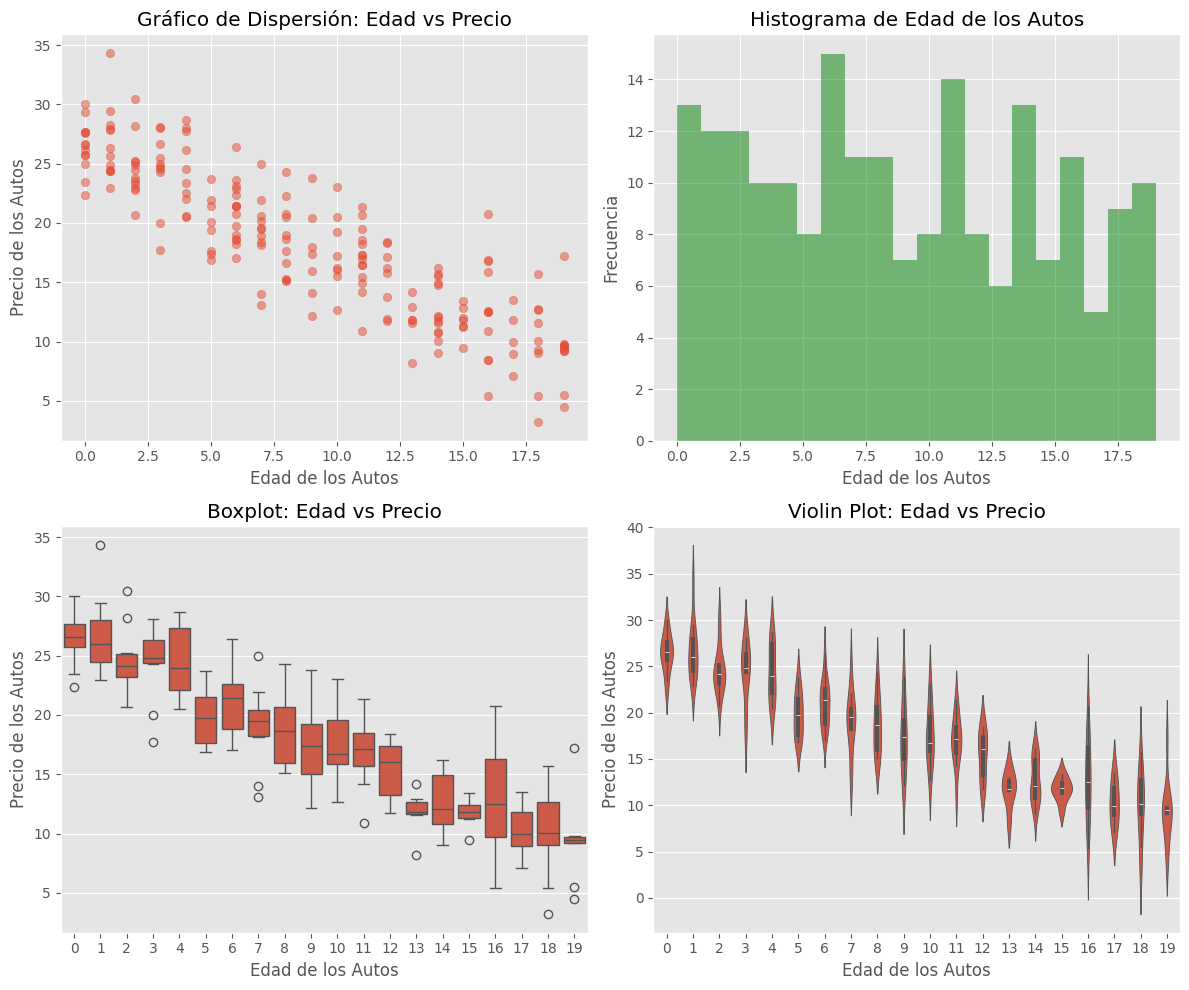

In [183]:
# crear un gráfico de dispersión con Seaborn
fig, ax = plt.subplots(2,2, figsize=(12,10)) #crear una figura con 2 filas y 2 columnas de subgráficos
# grafico de dispersión
ax[0,0].scatter(data['edad_autos'], data['precio_autos'], alpha=0.5)
ax[0,0].set_xlabel('Edad de los Autos')  # Etiqueta del eje x
ax[0,0].set_ylabel('Precio de los Autos')  # Etiqueta del eje y
ax[0,0].set_title('Gráfico de Dispersión: Edad vs Precio')  # Título del gráfico
# histograma
ax[0,1].hist(data['edad_autos'], bins=20, color='g', alpha=0.5)  # Histograma de la edad de los autos
ax[0,1].set_xlabel('Edad de los Autos')  # Etiqueta del eje x
ax[0,1].set_ylabel('Frecuencia')  # Etiqueta del eje y          
ax[0,1].set_title('Histograma de Edad de los Autos')  # Título del gráfico
# boxplot
sns.boxplot(x='edad_autos', y='precio_autos', data=data, ax=ax[1,0])  # Boxplot de la edad de los autos vs precio
ax[1,0].set_xlabel('Edad de los Autos')  # Etiqueta del eje x
ax[1,0].set_ylabel('Precio de los Autos')  # Etiqueta del eje y
ax[1,0].set_title('Boxplot: Edad vs Precio')  # Título del gráfico          
# violin plot
sns.violinplot(x='edad_autos', y='precio_autos', data=data, ax=ax[1,1])  # Violin plot de la edad de los autos vs precio
ax[1,1].set_xlabel('Edad de los Autos')  # Etiqueta del eje x
ax[1,1].set_ylabel('Precio de los Autos')  # Etiqueta del eje y
ax[1,1].set_title('Violin Plot: Edad vs Precio')  # Título del gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones


In [185]:
# conjunto de datos tips
tips = sns.load_dataset('tips')  # Cargar el conjunto de datos 'tips' de Seaborn
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [190]:
tips.describe()  # Mostrar estadísticas descriptivas del conjunto de datos


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


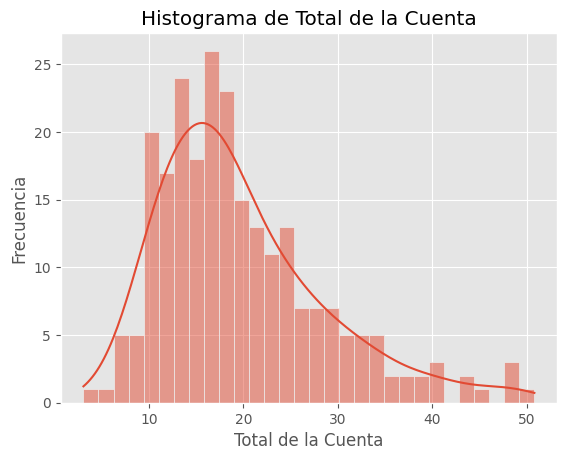

In [195]:
#histograma de la columna 'total_bill'
sns.histplot(data=tips, x='total_bill', bins=30, kde=True)  # Crear un histograma de la columna 'total_bill' con una curva KDE
plt.xlabel('Total de la Cuenta')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.title('Histograma de Total de la Cuenta')  # Título del gráfico
plt.show()  # Mostrar el gráfico

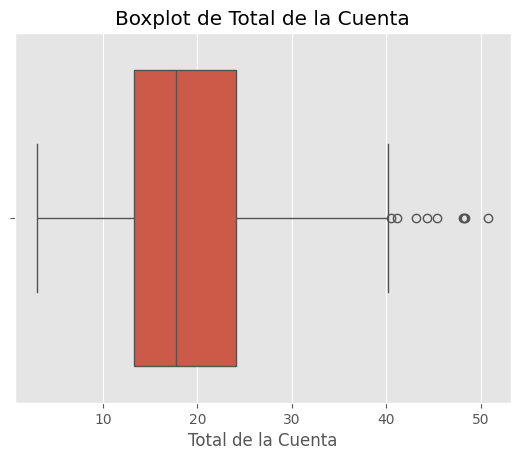

In [197]:
#boxplot de la columna 'total_bill'
sns.boxplot(x='total_bill', data=tips)  # Crear un boxplot de la columna 'total_bill'
plt.xlabel('Total de la Cuenta')  # Etiqueta del eje x  
plt.title('Boxplot de Total de la Cuenta')  # Título del gráfico
plt.show()  # Mostrar el gráfico

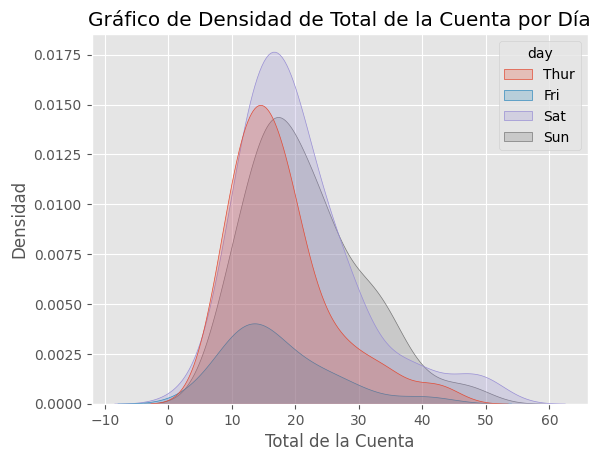

In [198]:
sns.kdeplot(data=tips, x='total_bill', hue='day', fill=True)  # Crear un gráfico de densidad de la columna 'total_bill' por día
plt.xlabel('Total de la Cuenta')  # Etiqueta del eje x
plt.ylabel('Densidad')  # Etiqueta del eje y
plt.title('Gráfico de Densidad de Total de la Cuenta por Día')  # Título del gráfico
plt.show()  # Mostrar el gráfico

In [189]:
tips.info()  # Mostrar información general del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
